## Data Loading and Initial Cleaning

In [134]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore')


In [135]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [136]:
df1.shape

(13320, 9)

In [137]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [138]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [139]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [140]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [141]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

##  Feature Engineering

In [142]:
df3['BHK'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

In [143]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [144]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [145]:
df3[df3.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [146]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [147]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [148]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [149]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2 :
        return (float(tokens[0])+float(tokens[1]))/2
    try: 
        return float(x)
    except:
        return None

In [150]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [151]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head(3)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


In [152]:
len(df5['location'].unique())

1304

In [153]:
location_stats = df5['location'].value_counts()
location_stats

location
Whitefield                         534
Sarjapur  Road                     392
Electronic City                    302
Kanakpura Road                     266
Thanisandra                        233
                                  ... 
KAMAKIYA                             1
Wheelers Road                        1
MM Layout                            1
Devarabeesana Halli                  1
beml layout, basaveshwara nagar      1
Name: count, Length: 1304, dtype: int64

In [154]:
len(location_stats[location_stats<=10])

1063

In [155]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagadevanahalli                    10
Sadashiva Nagar                    10
BTM 1st Stage                      10
Naganathapura                      10
Gunjur Palya                       10
                                   ..
KAMAKIYA                            1
Wheelers Road                       1
MM Layout                           1
Devarabeesana Halli                 1
beml layout, basaveshwara nagar     1
Name: count, Length: 1063, dtype: int64

In [156]:
len(df5.location.unique())

1304

In [157]:
df5['location'] = df5['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
df5.head(20)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [158]:
len(df5.location.unique())

242

## Outlier Detection and Removal

In [159]:
df5[df5['total_sqft']/df5['BHK']<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [160]:
df5.shape

(13246, 7)

In [161]:
df6 = df5[~(df5['total_sqft']/df5['BHK']<300)]
df6.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [162]:
df6.shape

(12502, 7)

In [163]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [164]:
def remove_pps_otliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_otliers(df6)
df7.shape
    

(10244, 7)

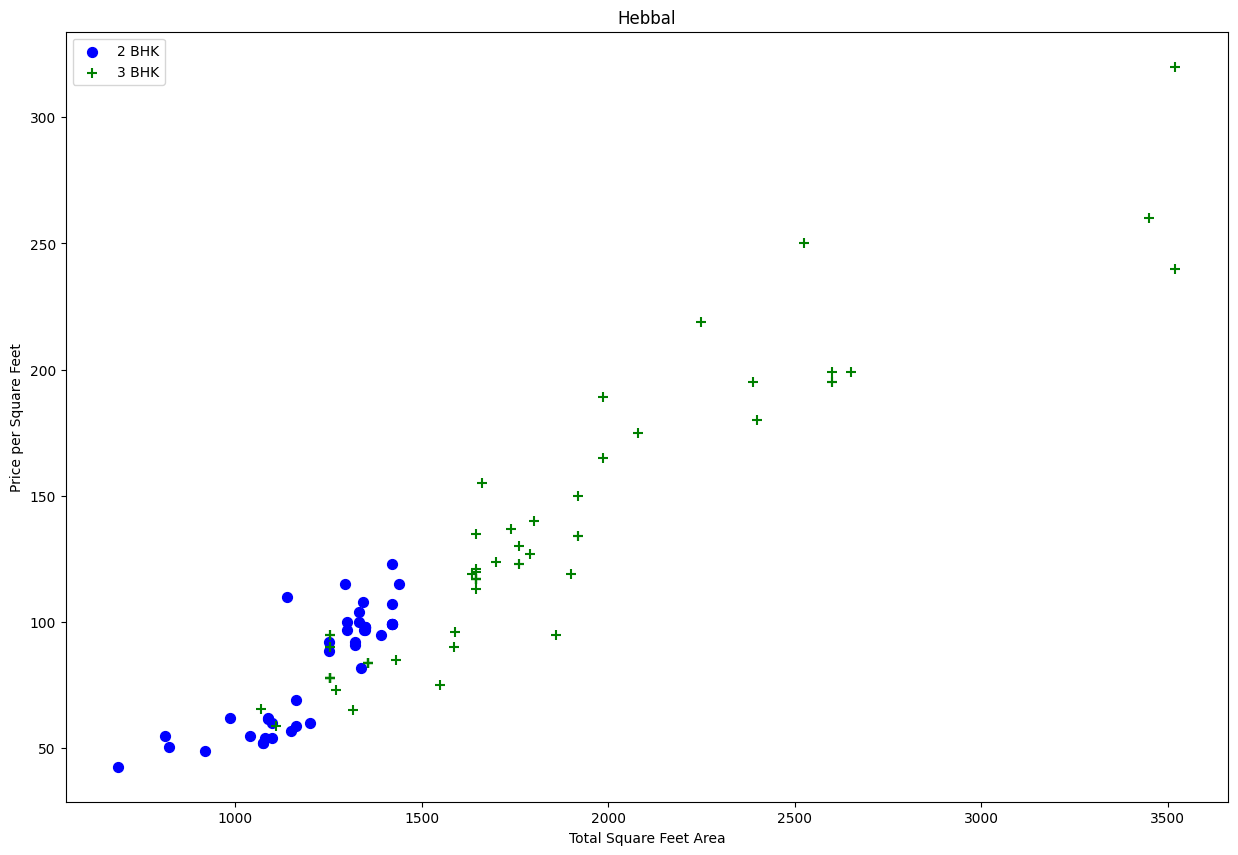

In [165]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)  & (df.BHK==2)]
    bhk3 = df[(df.location==location)  & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title(location)
    plt.legend()
    plt.show()    

plot_scatter_chart(df7,"Hebbal")

**We should also remove properties where for same location,the price of (for example)3 bedrooms apartment is less than 2 bedrooms is less than 2 bedrooms apartment(with same square ft area). What will do is for a given location,we will build a dictionary of stas per bhk i.e.**
    
    {
        '1' : {
            'mean' : 4000,
            'std' : 2000,
            'count' : 34
        },
        '2' : {
            'mean' : 4300,
            'std' : 2300,
            'count' : 22
        },
    }

**Now we can remove those 2BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [166]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location') :
        bhk_stats = {}
        for bhk ,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('BHK') : 
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5 :
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


df8 = remove_bhk_outliers(df7)
df8.shape      
            

(7342, 7)

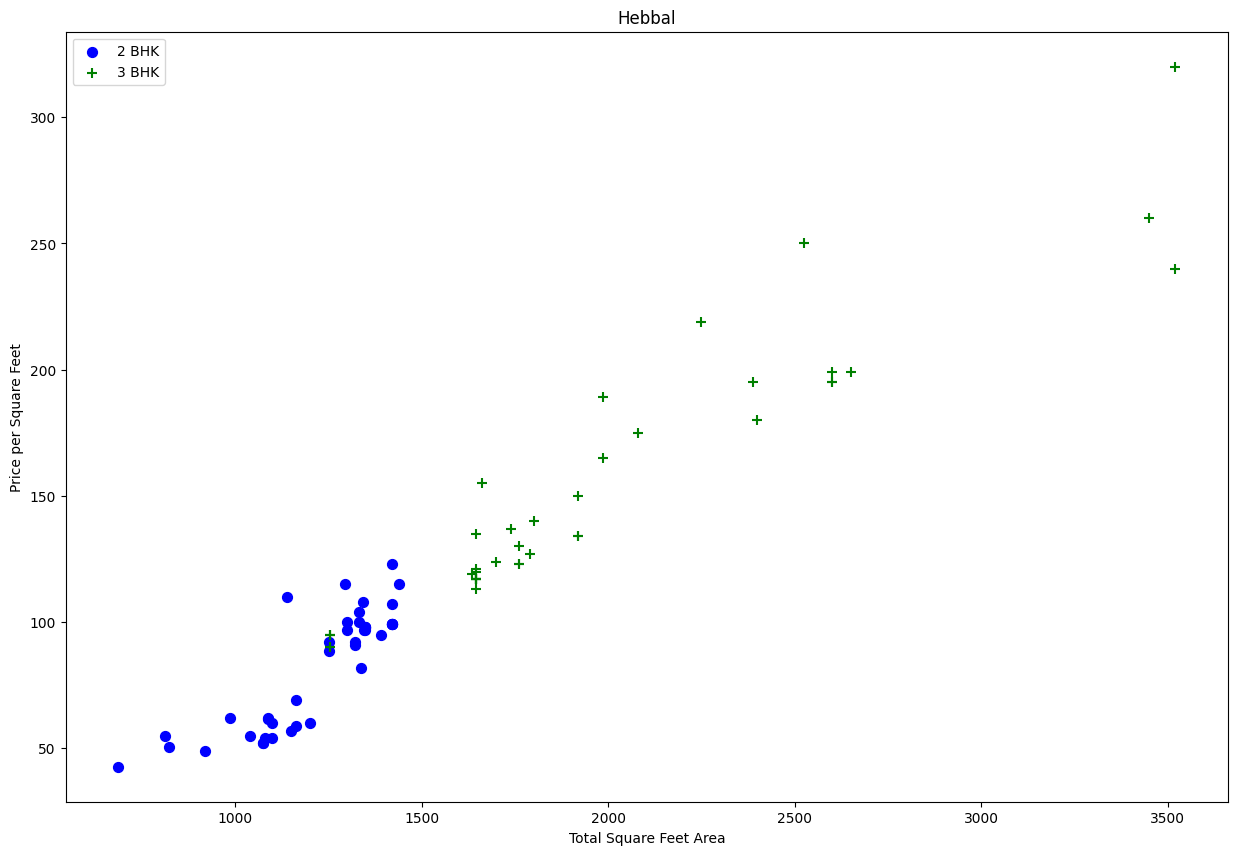

In [167]:
plot_scatter_chart(df8,"Hebbal")

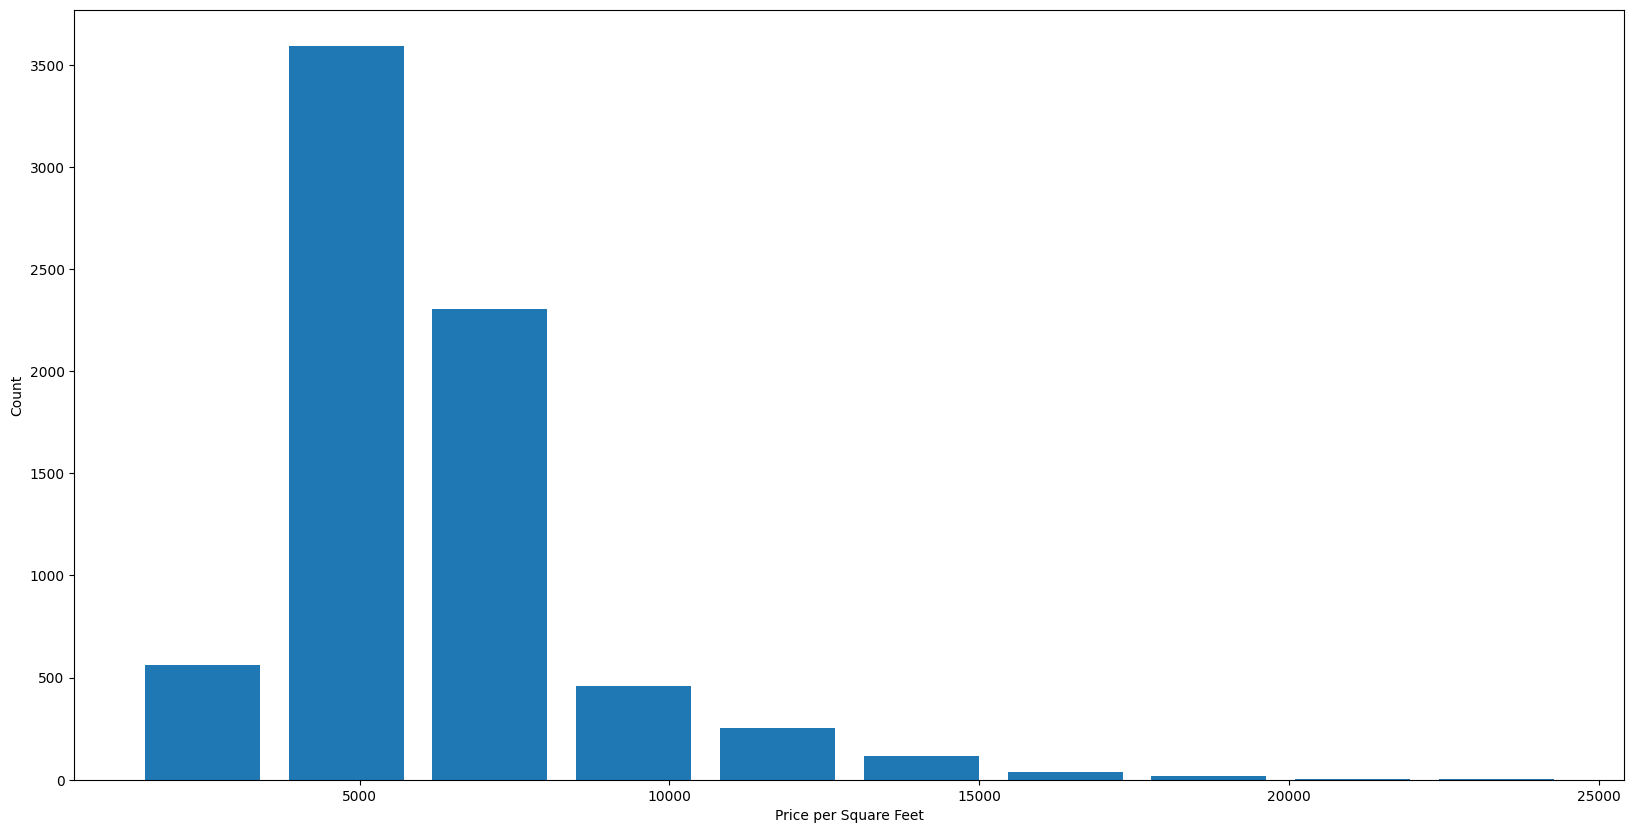

In [168]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")
plt.show()

In [169]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [170]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


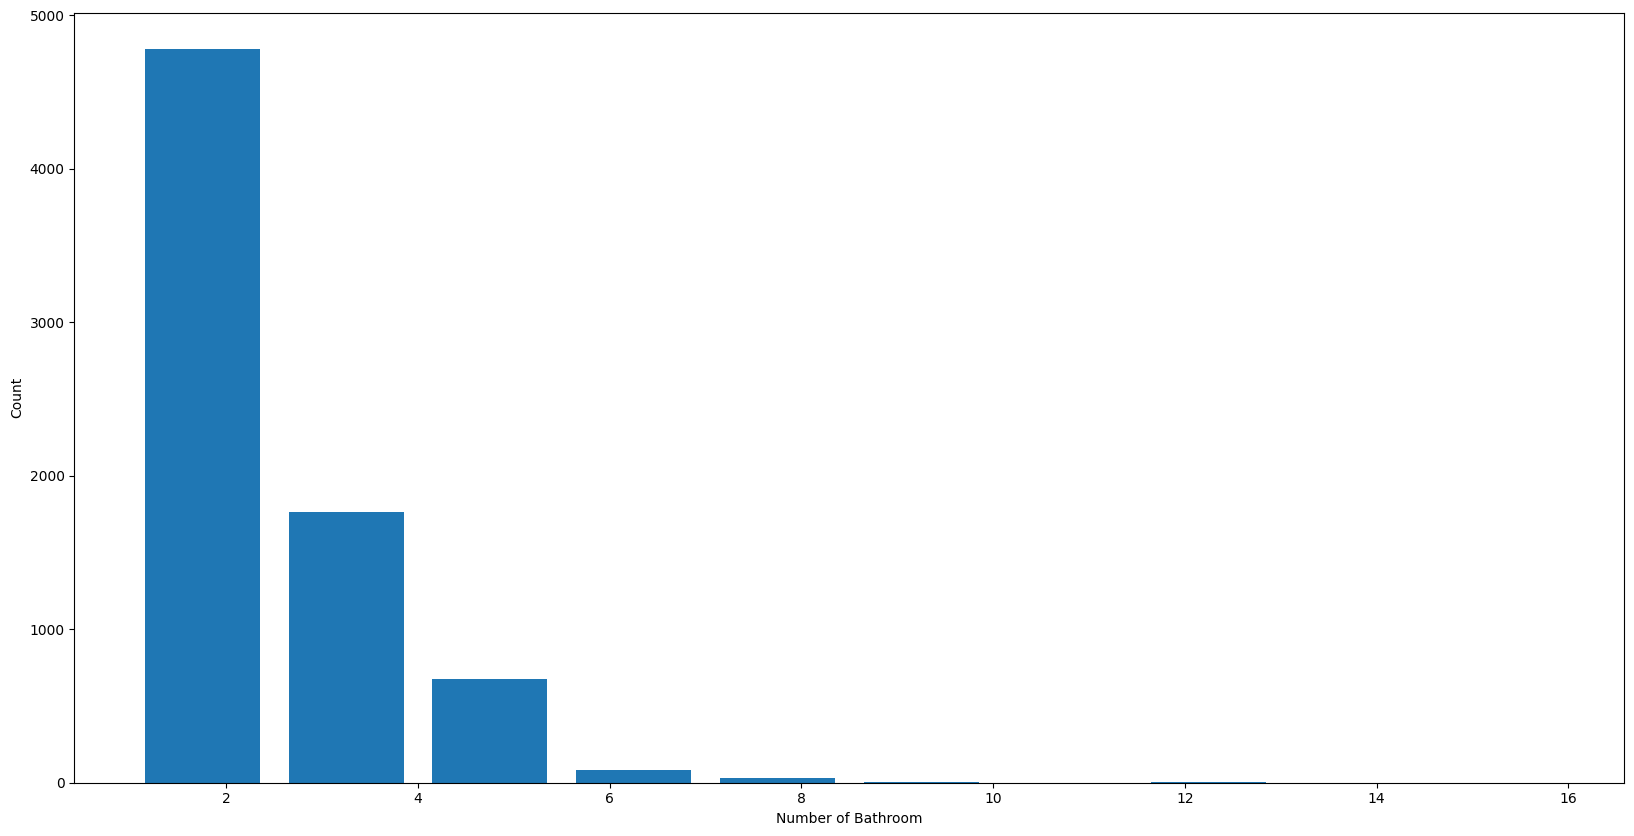

In [171]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathroom")
plt.ylabel("Count")
plt.show()

In [172]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [173]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7264, 7)

In [174]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


## One Hot Encoding

In [175]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [176]:
df11 = pd.concat([df10,dummies.drop('other',axis=1)],axis=1)
df11.head(3)

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [177]:
df12 = df11.drop('location',axis='columns')
df12.head(3)

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [178]:
df12.shape

(7264, 245)

## Feature and Label Separation

In [179]:
X = df12.drop('price',axis=1)
X.head()

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [180]:
y = df12.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

## Train Test Split

In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [182]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.864792850727128

## K Fold Validation with ShuffleSplit

In [183]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2 , random_state=42)

cross_val_score(LinearRegression(),X,y,cv=cv)


array([0.86479285, 0.85313203, 0.83991809, 0.84397117, 0.80206901])

## GridSearch CV

In [184]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    
    scores = []
    
    cv = ShuffleSplit(n_splits=5 , test_size=0.2 ,random_state=42)
    for algo_name , config in algos.items() :
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    
    return pd.DataFrame(scores,columns = ['model','best_score','best_params'])
 

find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.841225,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.685817,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.721787,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


## Price Predict Function

In [191]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    # loc_index = X.columns.get_loc(location)
    
    x= np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0 :
        x[loc_index] = 1 
        
    return lr_clf.predict([x])[0]
    

In [194]:
X.columns

Index(['total_sqft', 'bath', 'BHK', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [196]:
predict_price('1st Phase JP Nagar' ,1000,2,2)

np.float64(88.52930125569056)

In [195]:
predict_price('1st Phase JP Nagar' ,1000,3,3)

np.float64(91.45734003985277)

In [197]:
predict_price('Indira Nagar' ,1000,2,2)

np.float64(191.08738933467885)

## Saving the Model and Feature Columns

In [198]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [199]:
import json
columns = {
    'data_columns' : [col.lower()for col in X.columns]
}
with open('columns.json','w') as f :
    f.write(json.dumps(columns))